In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *
init_notebook_mode(connected=True)
from pyspark.sql.functions import *

In [2]:
events=sqlContext.read.csv("/Users/KP/Desktop/kaggle/events.csv", header=True, inferSchema=True)

In [3]:
events.first()

Row(display_id=1, uuid='cb8c55702adb93', document_id=379743, timestamp=61, platform='3', geo_location='US>SC>519')

In [4]:
events.select('uuid').distinct().count()

19794967

In [5]:
events.select('display_id').distinct().count()

23120126

In [6]:
events.select('document_id').distinct().count()

894060

In [7]:
events.groupby(['geo_location']).agg(countDistinct('display_id')).sort('count(DISTINCT display_id)', ascending=False).show()

+------------+--------------------------+
|geo_location|count(DISTINCT display_id)|
+------------+--------------------------+
|   US>CA>803|                   1017071|
|   US>NY>501|                    809302|
|          US|                    758487|
|   US>CA>807|                    695787|
|   US>IL>602|                    564778|
|       CA>ON|                    543732|
|   US>TX>618|                    534237|
|   US>TX>623|                    428139|
|   US>PA>504|                    428118|
|   US>MI>505|                    408081|
|   US>NJ>501|                    384340|
|   US>GA>524|                    382857|
|   US>MA>506|                    367162|
|   US>WA>819|                    353259|
|   US>AZ>753|                    302411|
|   US>FL>539|                    271259|
|   US>CO>751|                    268604|
|   US>MN>613|                    261448|
|   US>VA>511|                    254362|
|   US>FL>534|                    247138|
+------------+--------------------

In [9]:
events.groupby(['platform']).agg(countDistinct('display_id')).sort('count(DISTINCT display_id)', ascending=False).show()

+--------+--------------------------+
|platform|count(DISTINCT display_id)|
+--------+--------------------------+
|       2|                  10976278|
|       1|                   9027268|
|       3|                   3116575|
|      \N|                         5|
+--------+--------------------------+



In [10]:
events.groupby(['uuid']).agg({'display_id':'count'}).sort('count(display_id)', ascending=False).show()

+--------------+-----------------+
|          uuid|count(display_id)|
+--------------+-----------------+
|b88553e3a2aa29|               49|
|2759b057797f02|               46|
|c0bd502c7a479f|               42|
|ef7761dd22277c|               38|
|45d23867dbe3b3|               38|
|e601f797f54648|               37|
|b1a50275723112|               37|
|d3c78fa645bc80|               35|
|fc74449da31ccf|               33|
|d75b62c7bfb505|               32|
|fdf7c0aafecb30|               32|
|1f297946d378ca|               31|
|38dc1c4795c07b|               31|
|a1b40bf39df4a8|               31|
|db6bc2a4fd1f83|               31|
|c59cac784d9594|               30|
|1af2922ca85827|               30|
|78f87f084312f2|               30|
|ef1ac188934774|               29|
|601353e79ef2dd|               29|
+--------------+-----------------+
only showing top 20 rows



In [8]:
clicks_train_df=sqlContext.read.csv("/Users/KP/Desktop/kaggle/clicks_train.csv", header=True, inferSchema=True)

In [12]:
clicks_train_df.first()

Row(display_id=1, ad_id=42337, clicked=0)

In [13]:
clicks_train_df.select('display_id').distinct().count()

16874593

In [14]:
clicks_train_df.select('ad_id').distinct().count()

478950

In [9]:
events.registerTempTable("events")

In [10]:
clicks_train_df.registerTempTable("clicks_train")

In [11]:
join_on_display_id = sqlContext.sql("SELECT events.uuid, events.display_id, events.document_id, events.platform, events.geo_location, events.timestamp,\
                                    clicks_train.ad_id, clicks_train.clicked \
                                    FROM events \
                                    JOIN clicks_train \
                                    ON events.display_id == clicks_train.display_id \
                                    ORDER BY events.display_id")

In [12]:
joined=join_on_display_id.cache()

In [13]:
filter_user_b88553e3a2aa29=joined.filter(joined.uuid == 'b88553e3a2aa29').where(joined.clicked != 0).orderBy("display_id", "document_id")

In [14]:
#user with most display_id served
filter_user_b88553e3a2aa29_pd = filter_user_b88553e3a2aa29.toPandas()
filter_user_b88553e3a2aa29_pd.astype({'uuid':'category', 'display_id':'int', 'platform':'int', 'geo_location':'category', 'timestamp':'int',\
                                       'ad_id':'int', 'clicked':'int'})

,uuid,display_id,document_id,platform,geo_location,timestamp,ad_id,clicked
0,b88553e3a2aa29,1317741,1822893,2,US>IN>588,78887479,74785,1
1,b88553e3a2aa29,1320801,1804333,2,US>IN>588,79056230,148294,1
2,b88553e3a2aa29,1324773,1759736,2,US>IN>588,79289414,225494,1
3,b88553e3a2aa29,2674367,1937441,2,US>IN>588,168608952,201778,1
4,b88553e3a2aa29,2683575,1804333,2,US>IN>588,169182578,157946,1
5,b88553e3a2aa29,2685333,1957800,2,US>IN>588,169303807,143411,1
6,b88553e3a2aa29,2690351,1916754,2,US>IN>588,169640759,117362,1
7,b88553e3a2aa29,3939928,2020042,2,US>IN>588,250873674,350551,1
8,b88553e3a2aa29,3941594,1994330,2,US>IN>588,250968402,237413,1
9,b88553e3a2aa29,3951750,1983049,2,US>IN>588,251578681,396427,1


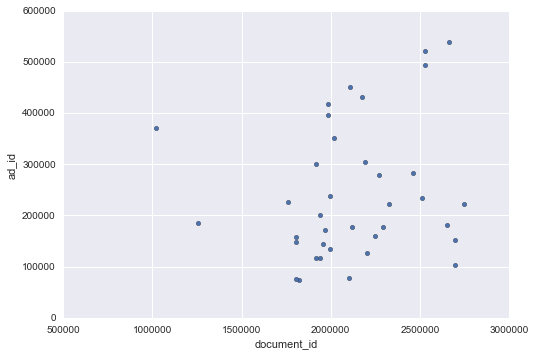

In [15]:
filter_user_b88553e3a2aa29_pd.plot.scatter('document_id','ad_id')

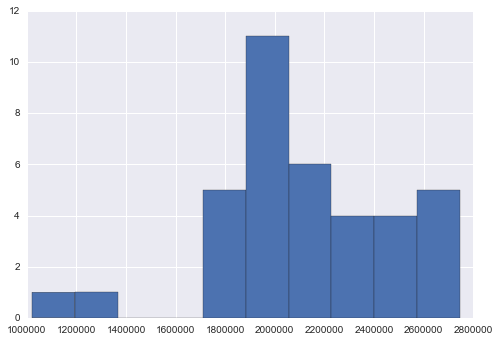

In [21]:
filter_user_b88553e3a2aa29_pd.document_id.hist()

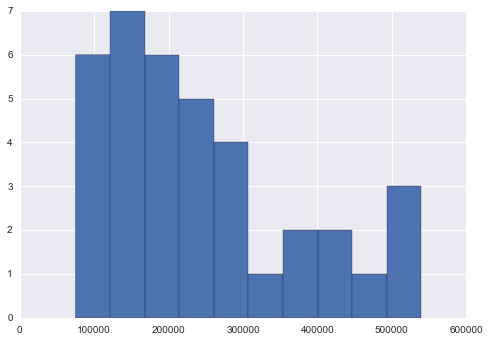

In [22]:
filter_user_b88553e3a2aa29_pd.ad_id.hist()

In [64]:
filter_clicked=joined.filter(joined.clicked != 0).groupby('uudid').agg(count('clicked')).sort('count(clicked)', ascending=False).toPandas()

In [65]:
filter_clicked.head()

,ad_id,count(clicked)
0,175214,44824
1,173130,41852
2,303990,41380
3,3314,36782
4,130952,35421


In [ ]:
#filter_clicked_pd=filter_clicked.toPandas()

In [ ]:
#g = sns.FacetGrid(filter_user_b88553e3a2aa29_pd, col="document_id")  
#g.map(sns.distplot, "ad_id")  

In [ ]:
#sns.factorplot(data=joined_pd, x="timestamp", y="clicked")

In [35]:
ad_clicks=joined.stat.crosstab('ad_id','clicked').sort('1', ascending=False)

In [36]:
doc_clicks=join_on_display_id.stat.crosstab('document_id','clicked').sort('1', ascending=False)

In [37]:
doc_clicks_r=doc_clicks.select(doc_clicks.document_id_clicked.cast('integer').alias('document_id'),doc_clicks['0'],doc_clicks['1'])\
                                        .withColumn('doc_ads',(doc_clicks['0']+doc_clicks['1']))\
                                        .withColumn('doc_click_ratio',(doc_clicks['1']/(doc_clicks['1']+doc_clicks['0'])))\
                                        .withColumn('doc_click_fraction',doc_clicks['1']/16874593)\
                                        .limit(10000)

In [38]:
doc_clicks_r.show(200)

+-----------+-------+------+-------+-------------------+--------------------+
|document_id|      0|     1|doc_ads|    doc_click_ratio|  doc_click_fraction|
+-----------+-------+------+-------+-------------------+--------------------+
|    1179111|1055231|235487|1290718|0.18244651426570327|0.013955121762047832|
|    1827718| 966244|140975|1107219|0.12732350149338117|0.008354275566824042|
|      38922|      0| 62868|  62868|                1.0|0.003725600967087...|
|    1788295|      0| 55487|  55487|                1.0|0.003288197824978...|
|    2102553| 196697| 52609| 249306|0.21102179650710373|0.003117645563362...|
|       7054| 238755| 47934| 286689|0.16719860196938147|0.002840601844441...|
|    1690147|      0| 41746|  41746|                1.0|0.002473896703760...|
|    1060089|      0| 34345|  34345|                1.0|0.002035308347881...|
|      38915|      0| 33617|  33617|                1.0|0.001992166566624...|
|    1717049| 178224| 27917| 206141|0.13542672248606535|0.001654

In [ ]:
#join_on_display_id.sample(False, 0.2, seed=None), test sampling dataframe

In [ ]:
#join_on_display_id.select('document_id').rdd.flatMap(lambda x: x) test using flatmap to create list of items to pass to pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119563518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c60d8d0>]], dtype=object)

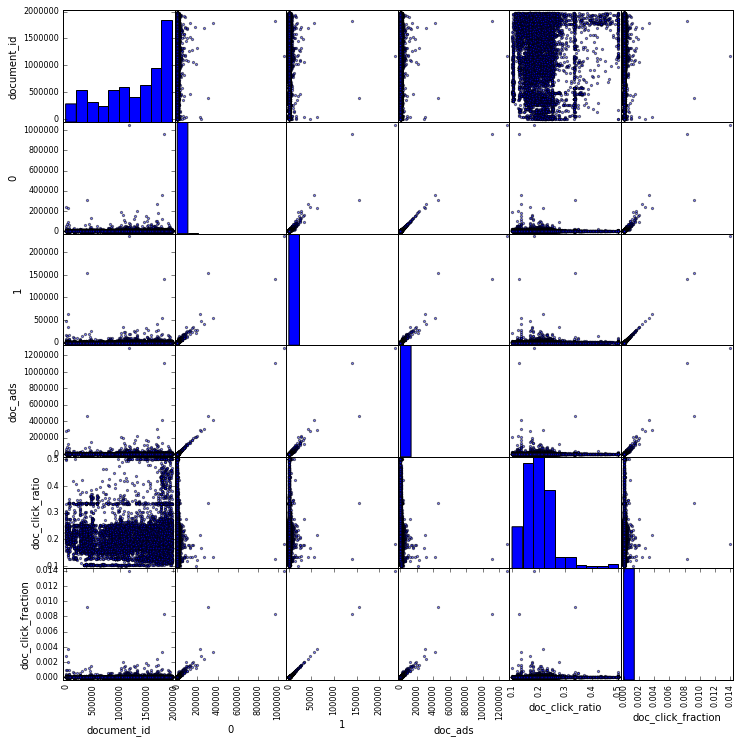

In [35]:
pd.scatter_matrix(doc_clicks_r.toPandas(), figsize=(12,12))

In [69]:
colorscale = ['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
fig1=FF.create_2D_density(x=doc_clicks_r.toPandas()['1'], 
                          y=doc_clicks_r.toPandas()['doc_click_ratio'],
                         colorscale=colorscale,
                            hist_color='rgb(255, 220, 200)', point_size=5
                          )
iplot(fig1)

In [73]:
fig2=[Scatter(x=doc_clicks_r.toPandas()['0'], 
                          y=doc_clicks_r.toPandas()['1']
                          )]
iplot(fig2)